In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/mushroom.csv")

In [3]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Unnamed:0 is unncessary column so we are dropping it.

In [4]:
data = data.drop(data.columns[data.columns.str.contains('unnamed', case=False)],axis=1)
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


# ***Task 1: Exploratory Data Analysis (EDA)***

In [5]:
data.shape

(2000, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

Our dataset has 25 columns, out of which only 2 are numerical.

In [7]:
# Check for missing values
data.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [8]:
# Summary statistics
data.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [9]:
# Explore categorical variables
for col in data.columns:
  if data[col].dtype == 'object':
    print(data[col].value_counts())

cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64
cap_surface
scaly      568
smooth     513
fibrous    482
grooves    437
Name: count, dtype: int64
cap_color
brown     263
green     241
yellow    228
gray      226
pink      221
buff      220
red       216
white     200
purple    185
Name: count, dtype: int64
bruises
yes    1023
no      977
Name: count, dtype: int64
odor
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: count, dtype: int64
gill_attachment
free          540
notched       535
attached      487
descending    438
Name: count, dtype: int64
gill_spacing
distant    677
close      664
crowded    659
Name: count, dtype: int64
gill_size
narrow    1007
broad      993
Name: count, dtype: int64
gill_color
orange       216
black        192
green        183
purple       173
pink         168
buff         165
chocolate    161
gr

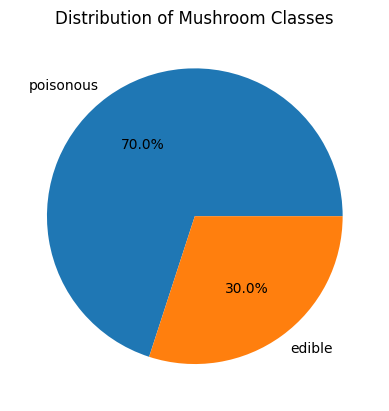

In [10]:
# Pie chart for class distribution
class_counts = data['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Mushroom Classes')
plt.show()


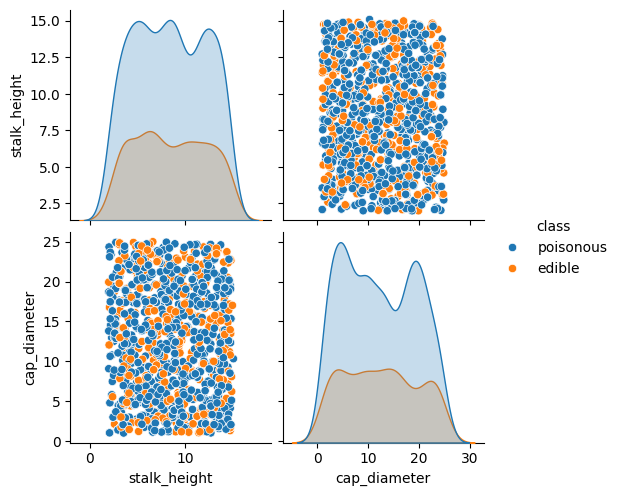

In [11]:
import matplotlib.pyplot as plt
sns.pairplot(data, hue='class')
plt.show()


In [12]:
# labelencoding the dataset
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = label_encoder.fit_transform(data[col])


In [13]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


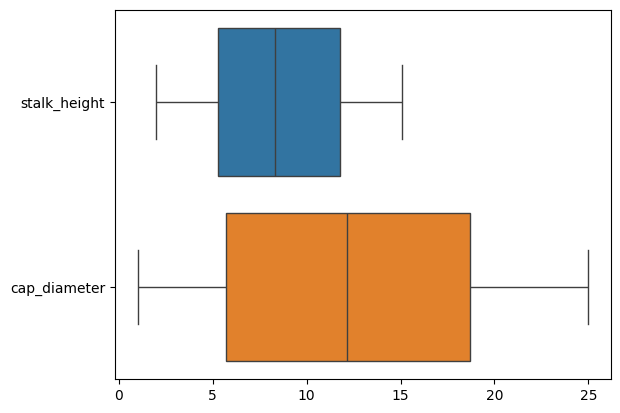

In [14]:
sns.boxplot(data[["stalk_height", "cap_diameter"]], orient = "h")
plt.show()

In [15]:
data.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
cap_shape,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,0.011573,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.024540,0.037743
cap_surface,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,-0.024032,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043482,0.016606
cap_color,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,-0.020397,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.044086,-0.000489
bruises,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,0.007928,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.064644,-0.046946
odor,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,0.009072,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.011217,-0.051549
gill_attachment,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,-0.018698,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.017367,-0.039526
gill_spacing,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,0.051041,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.016429,0.029169
gill_size,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,-0.046759,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.003273,-0.068743
gill_color,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,-0.056446,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026179,0.003895
stalk_shape,0.011573,-0.024032,-0.020397,0.007928,0.009072,-0.018698,0.051041,-0.046759,-0.056446,1.000000,...,0.004404,-0.051294,0.014983,0.011554,0.027410,-0.000393,-0.054938,0.024023,0.036862,-0.004822


<Axes: >

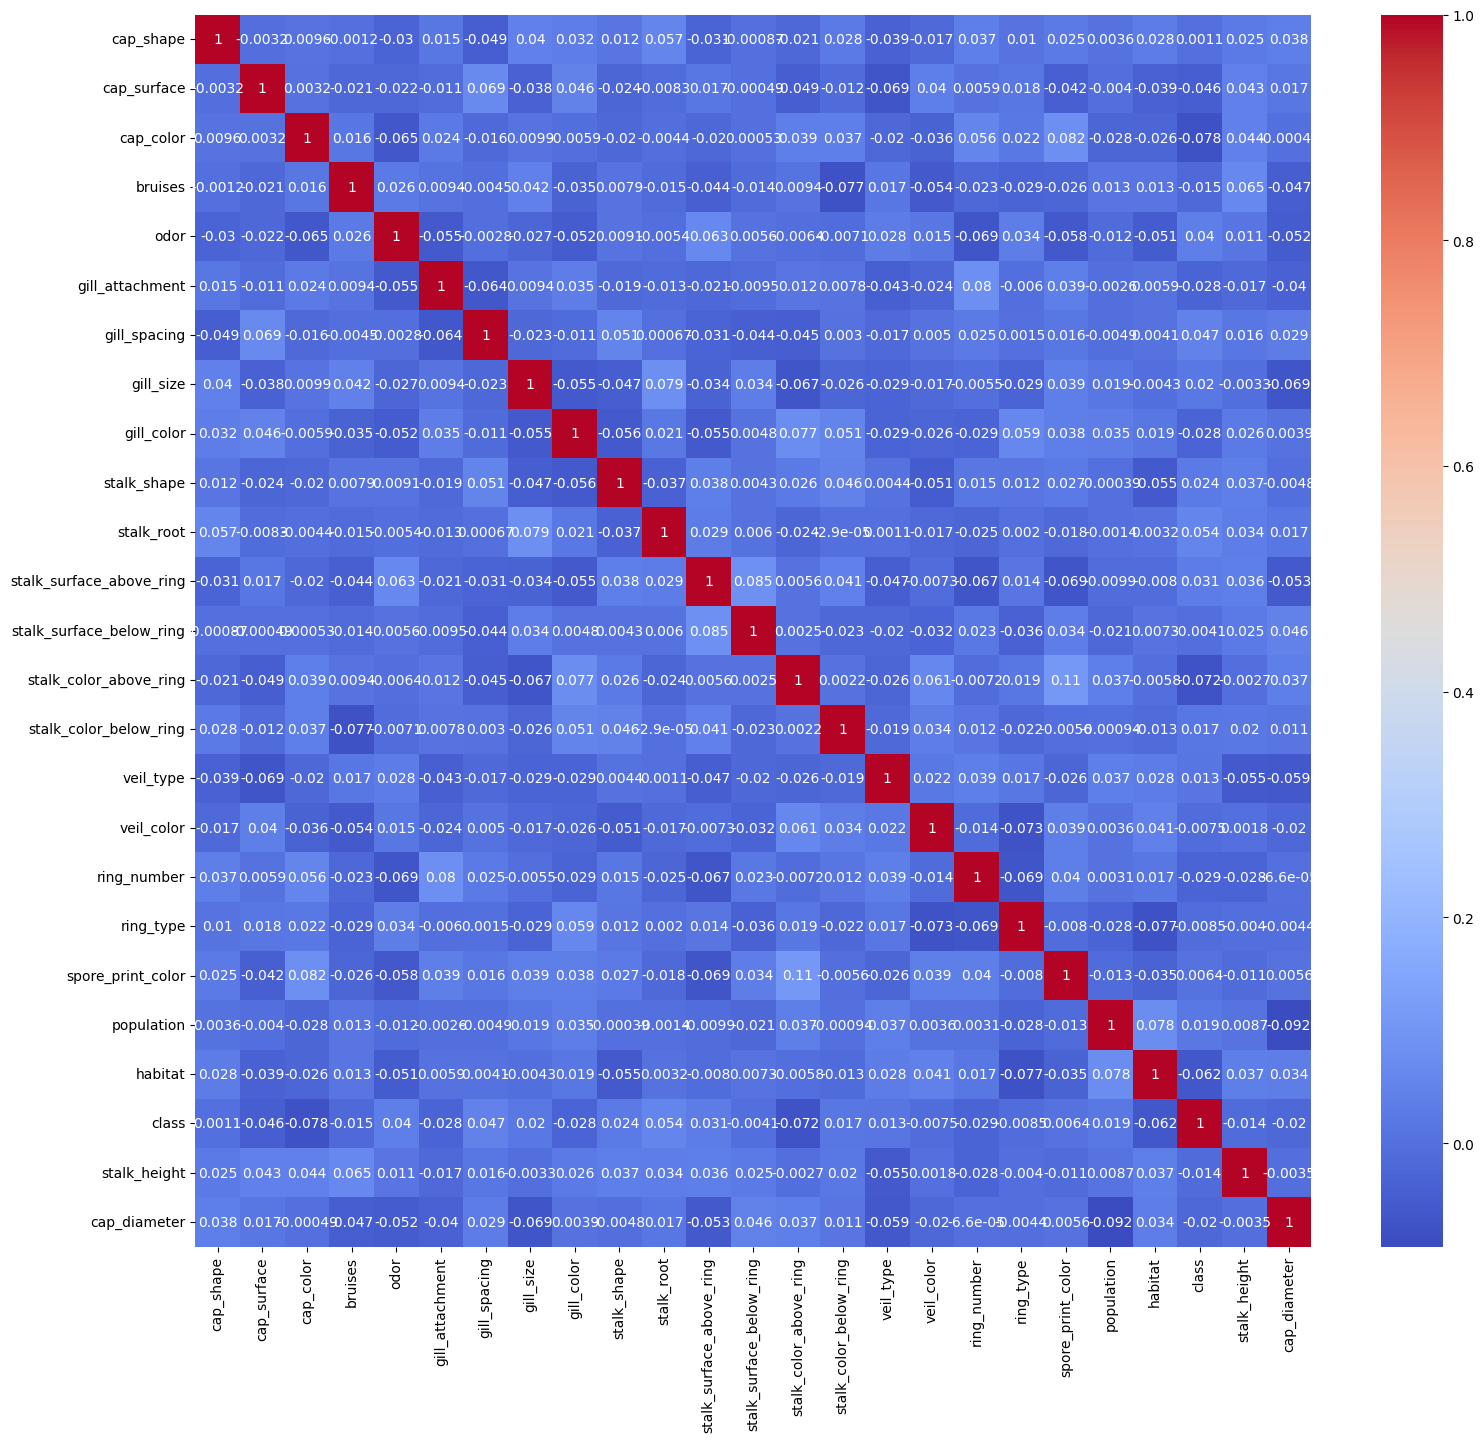

In [16]:
#heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap = "coolwarm")


There is weak correlation between each variable.

# ***Task 2: Data Preprocessing***



In [17]:
y= data['class']
x= data.drop(columns=['class'])

In [18]:
x.shape

(2000, 24)

In [19]:
y.shape

(2000,)

In [20]:
y_series = pd.Series(y)
print(y_series.head())

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int64


In [21]:
df = pd.DataFrame(x)
print(df.head())

   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0             2          0           7            1  ...   
1             1          1           3            0  ...   
2             1          0           8            1  ...   
3             0          0           6            0  ...   
4             1          1           6            0  ...   

   stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                       8          0           0            2          6   
1                       0          1           0      

Standard scaling the numerical columns.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [23]:
x

array([[ 1.35664266,  0.39842442,  1.19496641, ...,  0.97916574,
         1.57645935, -1.03012304],
       [ 1.35664266, -1.39628018,  0.81416131, ...,  0.97916574,
        -1.21646308,  0.95840718],
       [ 0.66003539, -0.49892788,  0.43335621, ...,  0.97916574,
         0.16371736, -0.72490441],
       ...,
       [-0.03657188, -0.49892788, -0.328254  , ...,  1.4865055 ,
         1.38218107, -0.14819255],
       [-1.42978643,  1.29577672,  1.19496641, ...,  1.4865055 ,
         0.71519905, -0.55216407],
       [-0.03657188,  0.39842442,  1.57577151, ...,  0.47182598,
         1.24916951,  1.24055562]])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

# SVM

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**1. LINEAR**

In [26]:
# Training the SVM model on the training data.

# Train the classifier
svm_classifier = SVC(C = 1, kernel='linear')
svm_classifier.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [27]:
#find the training and test score

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the classifier
training_score = svm_classifier.score(x_train, y_train)
test_score = accuracy_score(y_test, y_pred)

print("Training score:", training_score)
print("Test score:", test_score)


Training score: 0.7
Test score: 0.7


***AFTER TRYING VARIOUS C, WE CAN CONCLUDE THAT ACCURACY IS NOT CHANGING.***

In [28]:
pd.DataFrame({'C': {0: 0.1, 1: 1, 2: 2}, ' TESTING ACCURACY': {0: '70%', 1: '70%', 2: '70%'},
              ' TRAINING ACCURACY': {0: '70%', 1: '70%', 2: '70%'} })

,C,TESTING ACCURACY,TRAINING ACCURACY
0,0.1,70%,70%
1,1.0,70%,70%
2,2.0,70%,70%


In [29]:
 #Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7
Recall: 1.0
F1-score: 0.8235294117647058


2. **POLY**

In [44]:
# Training the SVM model on the training data.

# Train the classifier
svm_classifier = SVC(kernel='poly' , degree = 4)
svm_classifier.fit(x_train, y_train)


SVC(degree=4, kernel='poly')

In [45]:
#find the training and test score

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the classifier
training_score = svm_classifier.score(x_train, y_train)
test_score = accuracy_score(y_test, y_pred)

print("Training score:", training_score)
print("Test score:", test_score)


Training score: 0.963125
Test score: 0.835


**3. RBF**

In [38]:
svm_classifier = SVC(kernel='rbf' , C = 2)
svm_classifier.fit(x_train, y_train)

SVC(C=2)

In [39]:
# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the classifier
training_score = svm_classifier.score(x_train, y_train)
test_score = accuracy_score(y_test, y_pred)

print("Training score:", training_score)
print("Test score:", test_score)

Training score: 0.964375
Test score: 0.8175


**POLY KERNEL IS PERFORMING BEST.**

**Discuss practical implications of SVM in real-world classification tasks.**



*  SVMs perform well in text classification, image recognition, and bioinformatics, where data is often high-dimensional.

    Example: In text classification, each word in a document can be treated as a dimension. SVMs can efficiently handle such high-dimensional spaces.


*   SVMs are effective in scenarios where there is a clear margin of separation between classes. The concept of margin maximization helps prevent overfitting, especially in cases with a small number of data points relative to the number of features.

    Example: In medical diagnosis, where the number of cases (patients) is often small compared to the number of features (symptoms, test results), SVMs can help create models that generalize well.



*   SVMs have been successfully applied in various industries, including finance (credit scoring), healthcare (disease prediction), and marketing (customer segmentation).

    Example: In the finance sector, SVMs are used to assess the risk of loan applicants, improving decision-making processes for lenders.



